In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess

import common


In [12]:
df = common.run_benchmark(args="--ray_offset 0.2 --omp_n_threads 1 --p_rays_end 16")
df = df.set_index("n_rays")

# claculate rays per secon
df_rps = pd.DataFrame()
df_rps["rps_ovdb"] = df.index / df["time_ovdb"]
df_rps["rps_nvdb_cpu"] = df.index /df["time_nvdb_cpu"] 
df_rps["rps_nvdb_gpu"] = df.index / df["time_nvdb_gpu"]
df_rps

/home/hiti/Workspace/SelectedTopicsCompElectronics/build/src/raytracing --ray_offset 0.2 --omp_n_threads 8 --p_rays_end 16
Running benchmark with --ray_offset 0.2 --omp_n_threads 8 --p_rays_end 16
0.452: Running OpenVDB benchmark for 16 Rays
0.452: OpenVDB Finished in 0.000340438s (46.9983 kRays/s)
0.453: NanoVDB on CPU Finished in 0.000199349s (80.2613 kRays/s)
0.455: NanoVDB on GPU Finished in 0.000457792s (0.0349504 MRays/s)
0.455: Done

0.455: Running OpenVDB benchmark for 25 Rays
0.456: OpenVDB Finished in 9.8789e-05s (253.065 kRays/s)
0.456: NanoVDB on CPU Finished in 0.000345237s (72.414 kRays/s)
0.458: NanoVDB on GPU Finished in 0.000274343s (0.0911268 MRays/s)
0.458: Done

0.458: Running OpenVDB benchmark for 36 Rays
0.458: OpenVDB Finished in 0.000135287s (266.101 kRays/s)
0.459: NanoVDB on CPU Finished in 0.000247021s (145.737 kRays/s)
0.461: NanoVDB on GPU Finished in 0.000197867s (0.18194 MRays/s)
0.461: Done

0.461: Running OpenVDB benchmark for 64 Rays
0.461: OpenVDB Fin

,rps_ovdb,rps_nvdb_cpu,rps_nvdb_gpu
n_rays,,,
16,46998.278688,80261.250370,3.495037e+04
25,253064.612457,72414.022831,9.112680e+04
36,266100.955746,145736.597293,1.819404e+05
64,310782.199949,152471.709351,1.769231e+05
121,279241.938908,119722.560282,1.943569e+05
196,533014.249973,109907.363793,4.058391e+05
361,541513.537838,85835.073019,5.906182e+05
576,568209.843052,131684.232185,1.276681e+06
1024,385805.085544,145067.972278,2.716051e+06


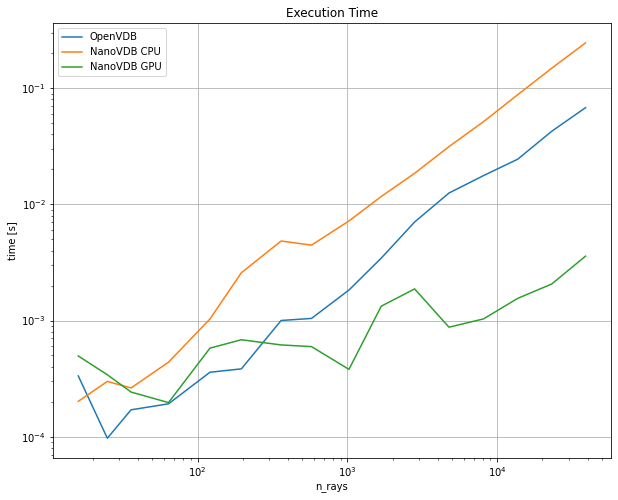

In [10]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["time_ovdb", "time_nvdb_cpu", "time_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot(y=cols)
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time [s]")
plt.title("Execution Time")
plt.show()


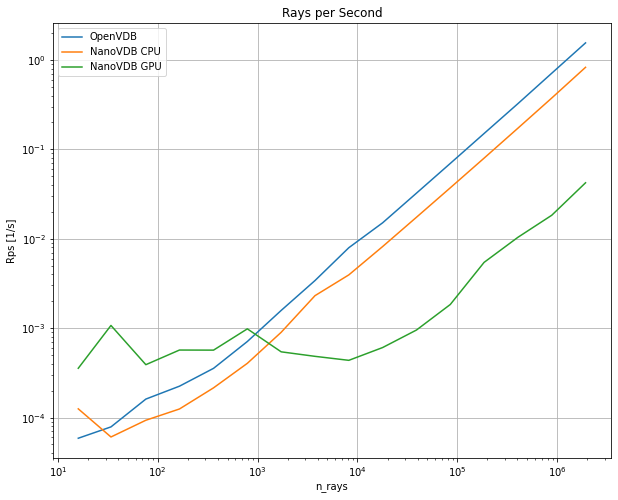

In [4]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["rps_ovdb", "rps_nvdb_cpu", "rps_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot()
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")
plt.show()

Text(0.5, 1.0, 'Relative Speed-Up for 1923096 rays (OpenVDB=1)')

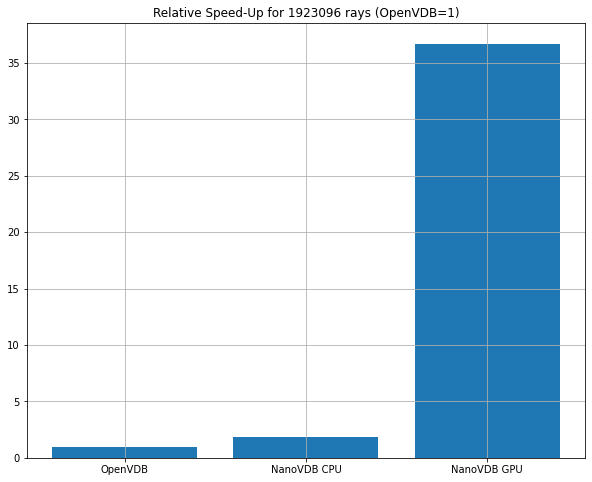

In [5]:
series = df_rps.iloc[-1]
series = series * 1/ series.nsmallest(1)[0]
n_rays = df_rps.index[-1]

plt.bar(cols_names, series.values)
plt.grid()
plt.title(f"Relative Speed-Up for {n_rays} rays (OpenVDB=1)")